In [1]:
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('Testdaten_Potenz.csv')
df

,x,y
0,1.000000,4.378516
1,2.154435,7.592097
2,4.641589,14.861859
3,10.000000,22.606554
4,21.544347,39.540957
5,46.415888,69.035232
6,100.000000,124.233149
7,215.443469,170.057699
8,464.158883,289.502057
9,1000.000000,482.887223


In [3]:
def f_lin(x, a,b):
    return a*x+b

In [4]:
p_opt, cov_opt = curve_fit(f_lin,np.log(df.x),np.log(df.y))
a,b = p_opt
kappa = a
c = np.exp(b)

(c,kappa)

(4.79430842808481, 0.6764790393088629)

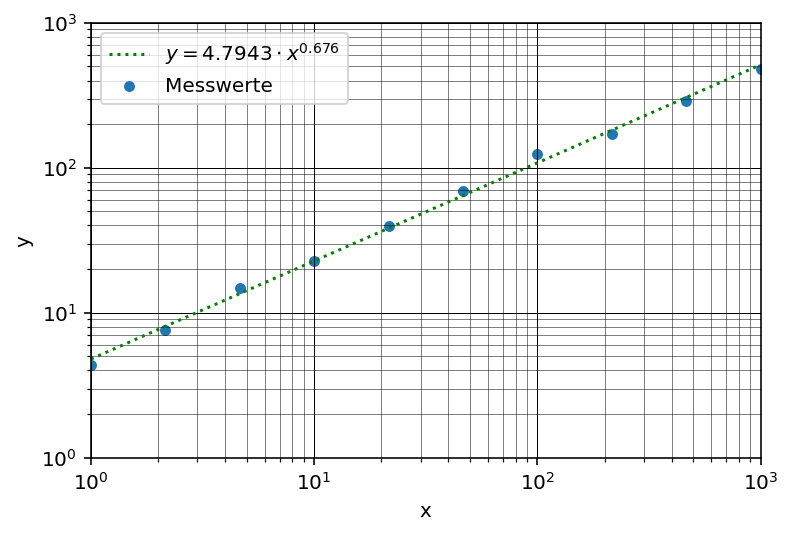

In [12]:
ax = df.plot(kind='scatter',x='x',y='y',loglog=True,label='Messwerte')
lx = np.linspace(min(df.x),max(df.x))
ax.plot(lx, c*lx**kappa,c='g',ls='dotted',label=f'$y={c:1.4f}\cdot x^{{{kappa:1.3f}}}$')
ax.set(xlim=(1,1e3),ylim=(1,1e3))
ax.grid(which='major',lw=0.5,c='k')
ax.grid(which='minor',lw=0.25,c='k')
ax.legend()
plt.savefig('Notebook_7_plot.pdf',bbox_inches='tight')